In [1]:
import json
from pathlib import Path

import pandas as pd
import pyprojroot
import seaborn as sns

In [2]:
HVC_RESULTS_ROOT = pyprojroot.here() / 'results/Bengalese_Finches/hvc'
source_csv = HVC_RESULTS_ROOT / 'segment_error_across_birds.hvc.csv'

In [3]:
hvc_df = pd.read_csv(source_csv)
hvc_df.rename(
    columns={'train_dur': 'training set duration (s)',
             'mean_segment_error_rate': 'segment error rate',
             },
    inplace=True)
hvc_df['source'] = hvc_df['source'].map({'ground_truth': 'ground truth', 'resegment': 'resegmented'})

In [4]:
FIG_ROOT = pyprojroot.here() / 'doc' / 'article' / 'figures' / 'mainfig_segment_models'

In [5]:
sns.set()

In [6]:
LEARNCURVE_RESULTS_ROOT = pyprojroot.here() / 'results' / 'Bengalese_Finches' / 'learncurve'
error_csv_path = LEARNCURVE_RESULTS_ROOT.joinpath('error_across_birds_with_cleanup.csv')
curve_df = pd.read_csv(error_csv_path)

curve_df = curve_df[curve_df.animal_id.isin(hvc_df.animal_id.unique())]
curve_df.rename(
    columns={'train_set_dur': 'training set duration (s)',
             'avg_segment_error_rate': 'segment error rate',
             },
    inplace=True)

<ipython-input-8-4e705fb350e7>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.axes[0][0].set_xticklabels(sorted(hvc_df['training set duration (s)'].unique()), rotation=45)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does n

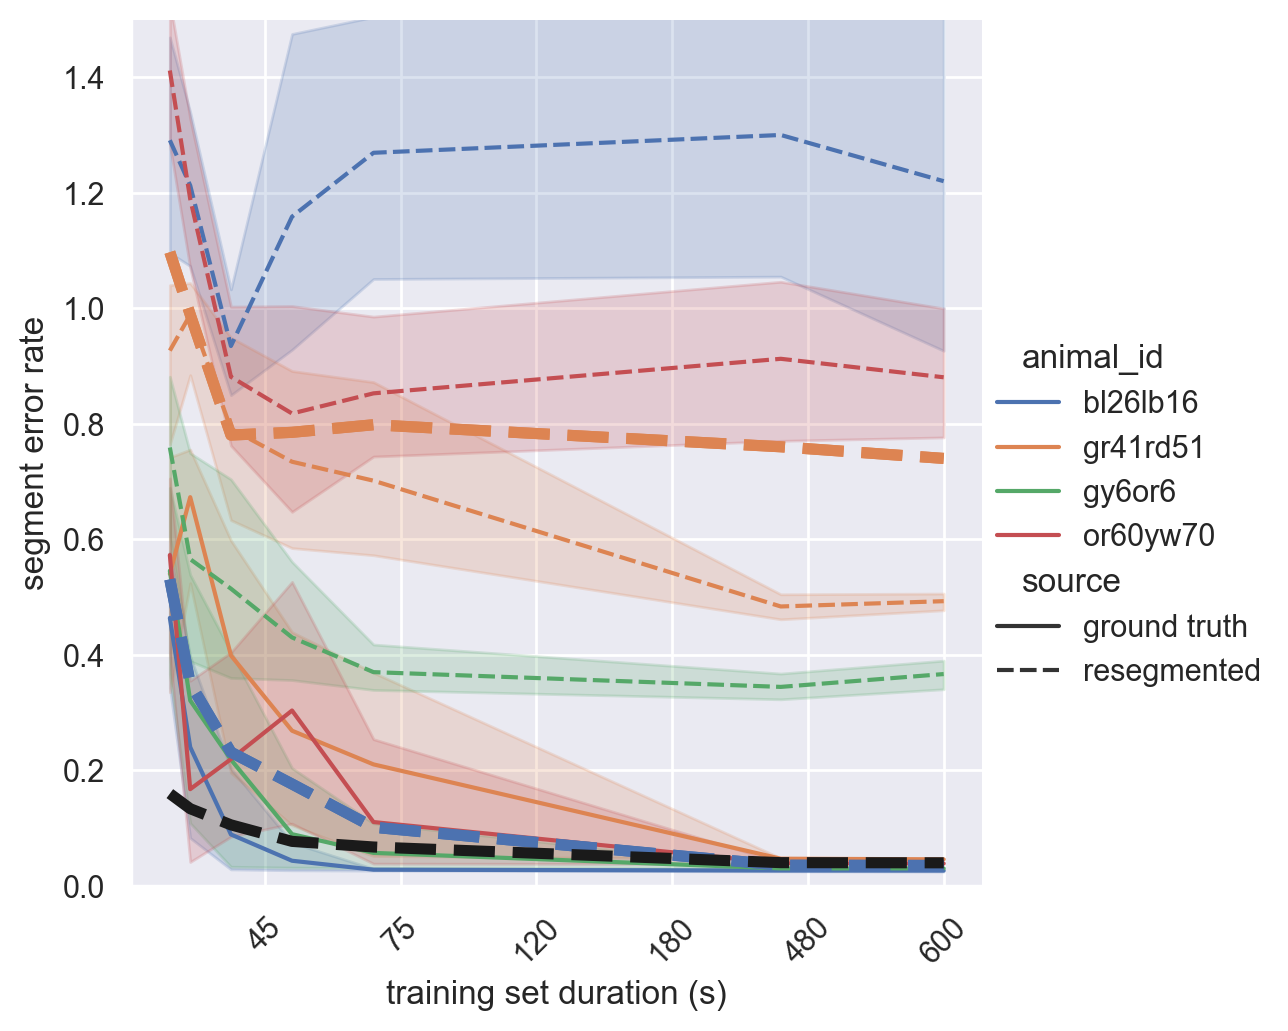

In [8]:
g = sns.relplot(
    data=hvc_df,
    x='training set duration (s)',
    y='segment error rate',
    hue='animal_id',
    style='source',
    kind='line',
)

ax = g.axes[0][0]
sns.lineplot(x='training set duration (s)',
             y='segment error rate',
             linestyle='dashed',
             linewidth=4,
             hue='source',
             data=hvc_df, ci=None, label='mean', ax=ax, legend=False)

sns.lineplot(x='training set duration (s)',
             y='segment error rate',
             linestyle='dashed',
             linewidth=4,
             hue='source',
             data=hvc_df, ci=None, label='mean', ax=ax, legend=False)

sns.lineplot(x='training set duration (s)',
             y='segment error rate',
             linestyle='dashed',
             color='k',
             linewidth=4,
             data=curve_df, ci=None, label='mean', ax=ax, legend=False)

g.axes[0][0].set_ylim([0., 1.5])

g.axes[0][0].set_xticklabels(sorted(hvc_df['training set duration (s)'].unique()), rotation=45)
g.fig.set_dpi(200)

FIG_STEM = 'segment-model-results'
    
for ext in ('eps', 'pdf', 'svg'):
    g.fig.savefig(FIG_ROOT / f'{FIG_STEM}.{ext}');